In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [ ]:
#a)	Import data

In [ ]:

Taxi = pd.read_parquet('/content/green_tripdata_2023-06.parquet')


In [ ]:
print("Data Information")

Data Information


In [ ]:
# a) Dataset Loaded using info()

In [ ]:
Taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65550 entries, 0 to 65549
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               65550 non-null  int32         
 1   lpep_pickup_datetime   65550 non-null  datetime64[us]
 2   lpep_dropoff_datetime  65550 non-null  datetime64[us]
 3   store_and_fwd_flag     60359 non-null  object        
 4   RatecodeID             60359 non-null  float64       
 5   PULocationID           65550 non-null  int32         
 6   DOLocationID           65550 non-null  int32         
 7   passenger_count        60359 non-null  float64       
 8   trip_distance          65550 non-null  float64       
 9   fare_amount            65550 non-null  float64       
 10  extra                  65550 non-null  float64       
 11  mta_tax                65550 non-null  float64       
 12  tip_amount             65550 non-null  float64       
 13  t

In [ ]:
Taxi.head(4)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-06-01 00:32:25,2023-06-01 00:39:06,N,1.0,74,42,1.0,0.84,7.9,1.0,0.5,2.08,0.0,NaN,1.0,12.48,1.0,1.0,0.00
1,2,2023-06-01 00:39:07,2023-06-01 00:51:59,N,1.0,41,229,1.0,4.05,19.1,1.0,0.5,3.65,0.0,NaN,1.0,28.00,1.0,1.0,2.75
2,2,2023-06-01 00:35:59,2023-06-01 00:57:06,N,1.0,97,89,1.0,4.26,23.3,1.0,0.5,5.16,0.0,NaN,1.0,30.96,1.0,1.0,0.00
3,2,2023-06-01 00:50:29,2023-06-01 01:00:32,N,1.0,75,263,1.0,1.79,12.1,1.0,0.5,3.47,0.0,NaN,1.0,20.82,1.0,1.0,2.75


In [ ]:
Taxi.tail(4)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
65546,2,2023-06-30 23:31:00,2023-06-30 23:41:00,None,NaN,223,260,NaN,3.05,13.76,0.0,0.0,2.95,0.0,NaN,1.0,17.71,NaN,NaN,NaN
65547,2,2023-06-30 23:03:00,2023-06-30 23:22:00,None,NaN,134,180,NaN,3.75,19.93,0.0,0.0,1.05,0.0,NaN,1.0,21.98,NaN,NaN,NaN
65548,2,2023-06-30 23:12:00,2023-06-30 23:32:00,None,NaN,33,157,NaN,5.29,27.20,0.0,0.0,5.64,0.0,NaN,1.0,33.84,NaN,NaN,NaN
65549,2,2023-06-30 23:36:00,2023-06-30 23:48:00,None,NaN,152,41,NaN,1.82,13.24,0.0,0.0,2.85,0.0,NaN,1.0,17.09,NaN,NaN,NaN


In [ ]:
# Drop the 'ehail_fee' column if it exists

In [ ]:
if 'ehail_fee' in Taxi.columns:
    Taxi.drop(columns=['ehail_fee'], inplace=True)
    print("Column 'ehail_fee' dropped successfully.")
else:
    print("Column 'ehail_fee' not found in the dataset.")


Column 'ehail_fee' dropped successfully.


In [ ]:
print("\nUpdated Dataset Information:")
Taxi.info()


Updated Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65550 entries, 0 to 65549
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               65550 non-null  int32         
 1   lpep_pickup_datetime   65550 non-null  datetime64[us]
 2   lpep_dropoff_datetime  65550 non-null  datetime64[us]
 3   store_and_fwd_flag     60359 non-null  object        
 4   RatecodeID             60359 non-null  float64       
 5   PULocationID           65550 non-null  int32         
 6   DOLocationID           65550 non-null  int32         
 7   passenger_count        60359 non-null  float64       
 8   trip_distance          65550 non-null  float64       
 9   fare_amount            65550 non-null  float64       
 10  extra                  65550 non-null  float64       
 11  mta_tax                65550 non-null  float64       
 12  tip_amount             65550 n

In [ ]:
# Convert pickup and dropoff columns to datetime (if not already in datetime format)
Taxi['lpep_pickup_datetime'] = pd.to_datetime(Taxi['lpep_pickup_datetime'])
Taxi['lpep_dropoff_datetime'] = pd.to_datetime(Taxi['lpep_dropoff_datetime'])
Taxi['trip_duration'] = (Taxi['lpep_dropoff_datetime'] - Taxi['lpep_pickup_datetime']).dt.total_seconds() / 60

In [ ]:
# Calculate trip duration in minute
print("Sample Data with Trip Duration :")
print(Taxi[['lpep_pickup_datetime','lpep_dropoff_datetime','trip_duration']].head())

Sample Data with Trip Duration :
  lpep_pickup_datetime lpep_dropoff_datetime  trip_duration
0  2023-06-01 00:32:25   2023-06-01 00:39:06       6.683333
1  2023-06-01 00:39:07   2023-06-01 00:51:59      12.866667
2  2023-06-01 00:35:59   2023-06-01 00:57:06      21.116667
3  2023-06-01 00:50:29   2023-06-01 01:00:32      10.050000
4  2023-06-01 00:15:15   2023-06-01 00:52:40      37.416667


In [ ]:
# Check for negative durations (if any
np.negative_durations = Taxi[Taxi['trip_duration'] < 0]
print("Number of Trips with negative Durations :{len(negative_durations)}")

Number of Trips with negative Durations :{len(negative_durations)}


In [ ]:
# e)	Extract hour as new variable “hourofday” from dropoff date variable and value_counts() of variable. Use pandas dt functions

In [ ]:
Taxi['lpep_dropoff_datetime'] = pd.to_datetime(Taxi['lpep_dropoff_datetime'])
Taxi['weekday'] = Taxi['lpep_dropoff_datetime'].dt.day_name()
Taxi['lpep_dropoff_datetime'] = pd.to_datetime(Taxi['lpep_dropoff_datetime']) # Extract the hour of the day as a new variable
Taxi['hourofday'] = Taxi['lpep_dropoff_datetime'].dt.hour  # Extracts hour (0-23)


In [ ]:
week_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
Taxi['weekday'] = pd.Categorical(Taxi['weekday'], categories=week_order, ordered=True)


In [ ]:
weekday_counts = Taxi['weekday'].value_counts().sort_index()
print("Weekday Counts (Ordered)", weekday_counts)

Weekday Counts (Ordered) weekday
Monday        8246
Tuesday       9036
Wednesday     9007
Thursday     11811
Friday       11802
Saturday      8199
Sunday        7449
Name: count, dtype: int64


In [ ]:
hour_counts = Taxi['hourofday'].value_counts().sort_index()
print("Hour of Day Counts (Ordered)", hour_counts)

Hour of Day Counts (Ordered) hourofday
0     1536
1      942
2      702
3      501
4      432
5      425
6      837
7     2224
8     2881
9     3424
10    3503
11    3450
12    3576
13    3476
14    3690
15    4310
16    4431
17    4675
18    5252
19    4553
20    3269
21    2906
22    2498
23    2057
Name: count, dtype: int64


In [ ]:
#  h)	Groupby() of average total_amount & weekday
avg_amount_per_weekday = Taxi.groupby("weekday")['total_amount'].mean().reset_index() # Group by weekday and calculate average total_amount
print("Average Total Amount by Weekday:\n", avg_amount_per_weekday)

Average Total Amount by Weekday:
      weekday  total_amount
0     Monday     23.539988
1    Tuesday     24.218163
2  Wednesday     24.455773
3   Thursday     24.800966
4     Friday     24.996170
5   Saturday     24.354775
6     Sunday     25.125006


<ipython-input-20-74834d84b032>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_amount_per_weekday = Taxi.groupby("weekday")['total_amount'].mean().reset_index() # Group by weekday and calculate average total_amount


In [ ]:
avg_amount_per_payment = Taxi.groupby("payment_type")['total_amount'].mean().reset_index() #Group by payment_type and calculate average total_amount
avg_amount_per_weekday = avg_amount_per_weekday.sort_values(by="total_amount", ascending=False)
payment_mapping = {1: "Credit Card", 2: "Cash", 3: "No Charge", 4: "Dispute"}
Taxi['payment_type'] = Taxi['payment_type'].map(payment_mapping)
print("\nAverage Total Amount by Payment Type:\n", avg_amount_per_payment)


Average Total Amount by Payment Type:
    payment_type  total_amount
0           1.0     25.847464
1           2.0     20.669402
2           3.0      5.930182
3           4.0      4.291600
4           5.0      4.500000


In [ ]:
avg_amount_per_weekday.to_csv("avg_amount_per_weekday.csv", index=False)
avg_amount_per_payment.to_csv("avg_amount_per_payment.csv", index=False)


In [ ]:
#f)	Missing Values Imputation

In [ ]:
# Missing values imputation in Python involves replacing missing data using methods like mean, median, mode, or advanced techniques like KNN or regression.
#Libraries like pandas (`fillna()`), scikit-learn (`SimpleImputer`), and fancyimpute (`KNNImputer`) help handle missing data.
# Proper imputation prevents bias and improves machine learning model performance and data integrity.

In [ ]:
missing_values = Taxi.isnull().sum()
print("Missing Values Before Imputation:\n", missing_values)

Missing Values Before Imputation:
 VendorID                    0
lpep_pickup_datetime        0
lpep_dropoff_datetime       0
store_and_fwd_flag       5191
RatecodeID               5191
PULocationID                0
DOLocationID                0
passenger_count          5191
trip_distance               0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
payment_type             5192
trip_type                5191
congestion_surcharge     5191
trip_duration               0
weekday                     0
hourofday                   0
dtype: int64


In [ ]:
num_cols = Taxi.select_dtypes(include=['number']).columns
cat_cols = Taxi.select_dtypes(include=['object']).columns
Taxi[num_cols] = Taxi[num_cols].fillna(Taxi[num_cols].mean())

In [ ]:
for col in cat_cols:
    Taxi[col] = Taxi[col].fillna(Taxi[col].mode()[0])


In [ ]:
datetime_cols = Taxi.select_dtypes(include=['datetime64']).columns
Taxi[datetime_cols] = Taxi[datetime_cols].fillna(method='ffill')

<ipython-input-28-6d73b96ab2cc>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Taxi[datetime_cols] = Taxi[datetime_cols].fillna(method='ffill')


In [ ]:
missing_values_after = Taxi.isnull().sum()
print("Missing Values After Imputation:\n", missing_values_after)

Missing Values After Imputation:
 VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
trip_duration            0
weekday                  0
hourofday                0
dtype: int64


In [ ]:
Taxi.to_parquet("modified_green_tripdata_2023-06.parquet",index=False)
Taxi.to_csv("modified_green_tripdata_2023-06.csv",index=False)

In [ ]:
# g)	Pie diagram of payment_type

In [ ]:
# A pie chart is a circular statistical graphic divided into slices to illustrate numerical proportions. Each slice represents a category’s contribution to the whole, with the entire chart equaling 100%.
# It is useful for comparing relative sizes but can become cluttered with many categories. Ideal for visualizing percentages and distributions.

In [ ]:
payment_counts = Taxi['payment_type'].value_counts()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'] # Define custom colors for better visualization

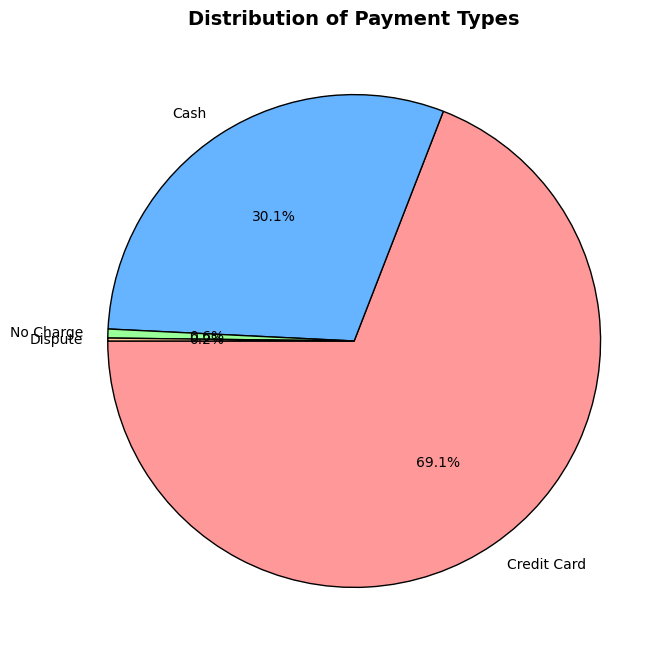

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%',
        startangle=180, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.title("Distribution of Payment Types", fontsize=14, fontweight='bold')
plt.show()


In [ ]:
# This pie chart represents the distribution of payment types.
#  "Credit Card" dominates with 69.1%, followed by "Cash" at 30.1%. "No Charge" and "Dispute" account for very small percentages.
# The chart effectively visualizes payment preferences, highlighting that most transactions occur via credit cards compared to other payment methods.

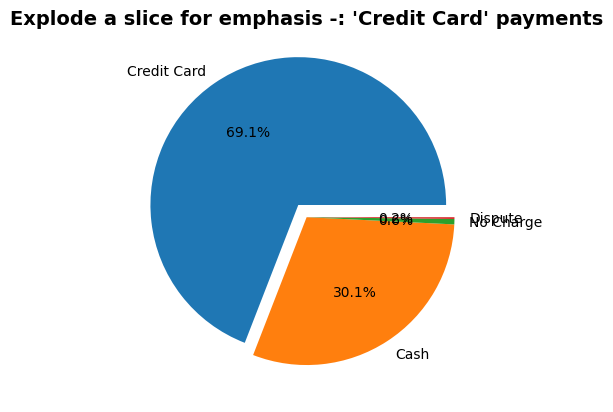

In [ ]:
# Optional Code
explode = [0.1 if label == 'Credit Card' else 0 for label in payment_counts.index]
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', explode=explode)
plt.title("Explode a slice for emphasis -: 'Credit Card' payments", fontsize=14, fontweight='bold')
plt.show()


In [ ]:
# This pie chart highlights "Credit Card" payments by exploding its slice.
# Credit cards dominate with 69.1%, followed by "Cash" at 30.1%. "No Charge" and "Dispute" contribute minimally.
# The emphasis on credit card transactions suggests their primary use in payments, making it an essential insight into customer payment preferences.

In [ ]:
# j)	Test null average total_amount of different trip_type is identical
# k)	Test null average total_amount of different weekday is identical


In [ ]:
Taxi = Taxi.dropna(subset=['trip_type','total_amount','payment_type'])
trip_type_groups = [group['total_amount'] for name, group in Taxi.groupby('trip_type')]


In [ ]:
if len(Taxi) < 1000:    # Check normality using Shapiro-Wilk Test (only for small samples <5000)
    for name, group in Taxi.groupby('trip_type'):
        stat, p = stats.shapiro(group['total_amount'])
        print(f'Shapiro-Wilk test for trip_type {name}: p={p}')




In [ ]:
# ANOVA-------> (Analysis of Variance) is a statistical method used to compare means across multiple groups to determine if significant differences exist.
# It analyzes variance within and between groups.
# Common types include one-way and two-way ANOVA. Used in hypothesis testing,
# ANOVA assumes normality and equal variances among groups for accuracy.

In [ ]:
anova_trip = stats.f_oneway(*trip_type_groups)
kruskal_trip = stats.kruskal(*trip_type_groups)
print(f'Kruskal-Wallis test result for trip_type: p-value={kruskal_trip.pvalue}')
print(f'ANOVA test result for trip_type: p-value={anova_trip.pvalue}')

Kruskal-Wallis test result for trip_type: p-value=0.0
ANOVA test result for trip_type: p-value=0.0


In [ ]:
Taxi['weekday'] = Taxi['lpep_pickup_datetime'].dt.day_name()
weekday_groups = [group['total_amount'] for name, group in Taxi.groupby('weekday')]


In [ ]:
anova_weekday = stats.f_oneway(*weekday_groups)
kruskal_weekday = stats.kruskal(*weekday_groups)
print(f'Kruskal-Wallis test result for weekday: p-value={kruskal_weekday.pvalue}')
print(f'ANOVA test result for weekday: p-value={anova_weekday.pvalue}')


Kruskal-Wallis test result for weekday: p-value=0.00018944861365211338
ANOVA test result for weekday: p-value=0.00017072292720633173


In [ ]:
contingency_table = pd.crosstab(Taxi['trip_type'], Taxi['payment_type'])  # Test if there is no association between trip_type and payment_type
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
numeric_vars = ['trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'trip_duration', 'passenger_count']
print(Taxi[numeric_vars].describe())   # Summary statistics for numeric variables
print(f'Chi-Square test result for trip_type and payment_type: p-value={p}')

       trip_distance   fare_amount         extra       mta_tax    tip_amount  \
count   65550.000000  65550.000000  65550.000000  65550.000000  65550.000000   
mean       22.430450     18.892448      0.882613      0.561037      2.415067   
std      1114.401748     22.605564      1.327904      0.381443      3.308543   
min         0.000000   -240.000000     -2.500000     -0.500000     -0.900000   
25%         1.180000     10.000000      0.000000      0.500000      0.000000   
50%         1.980000     14.200000      0.000000      0.500000      1.940000   
75%         3.600000     21.980000      1.000000      0.500000      3.690000   
max    179375.160000   4003.000000     10.000000      1.500000     96.300000   

       tolls_amount  improvement_surcharge  congestion_surcharge  \
count  65550.000000           65550.000000          65550.000000   
mean       0.253476               0.985623              0.746947   
std        1.355565               0.132579              1.173686   
min    

In [ ]:
object_vars = ['store_and_fwd_flag', 'RatecodeID', 'payment_type', 'trip_type', 'weekday', 'hourofday']
print(f'Object variables: {object_vars}')   #  Object variables


Object variables: ['store_and_fwd_flag', 'RatecodeID', 'payment_type', 'trip_type', 'weekday', 'hourofday']


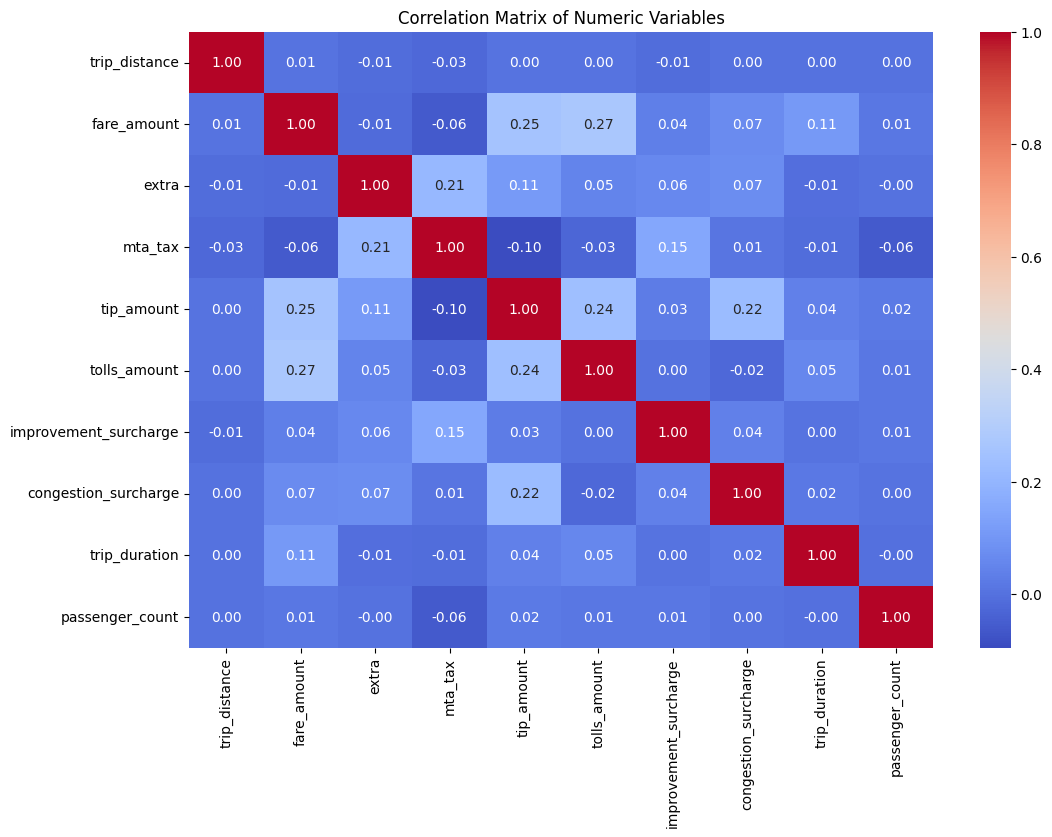

In [ ]:
corr_matrix = Taxi[numeric_vars].corr()  #  Correlation analysis of numeric columns
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Variables')
plt.show()


In [ ]:
# A correlation matrix visually represents relationships between numeric variables.
# In this heatmap, red indicates strong positive correlations, blue shows negative or weak ones.
# "Fare amount" and "Tip amount" have a moderate correlation (0.25), while "Trip distance" and "Trip duration" show no strong relationship.
# It's useful for feature selection and analysis.

In [ ]:
# A histogram is a graphical representation of data distribution using bars.
# Each bar represents the frequency of data within a specific range (bin).
# Unlike a bar chart, it displays continuous data, showing patterns like skewness and peaks.
#Histograms are useful in statistics for analyzing trends, variability, and data dispersion.

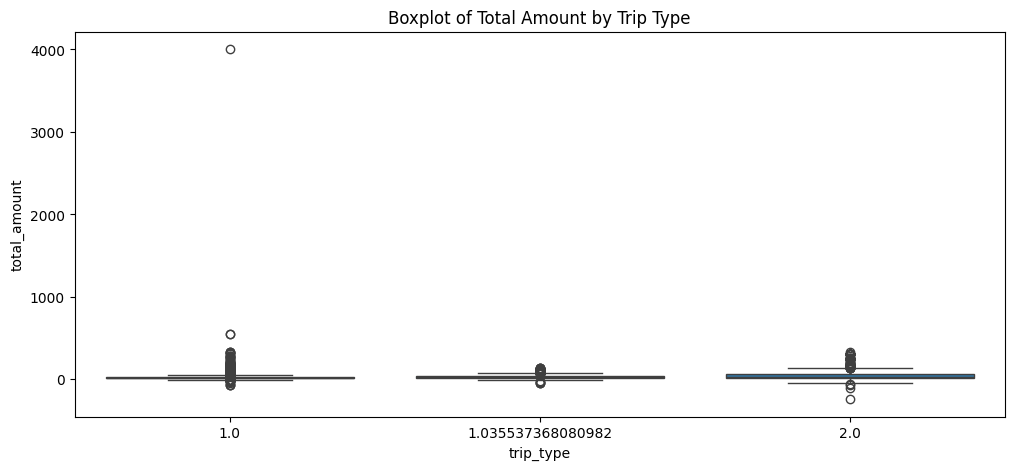

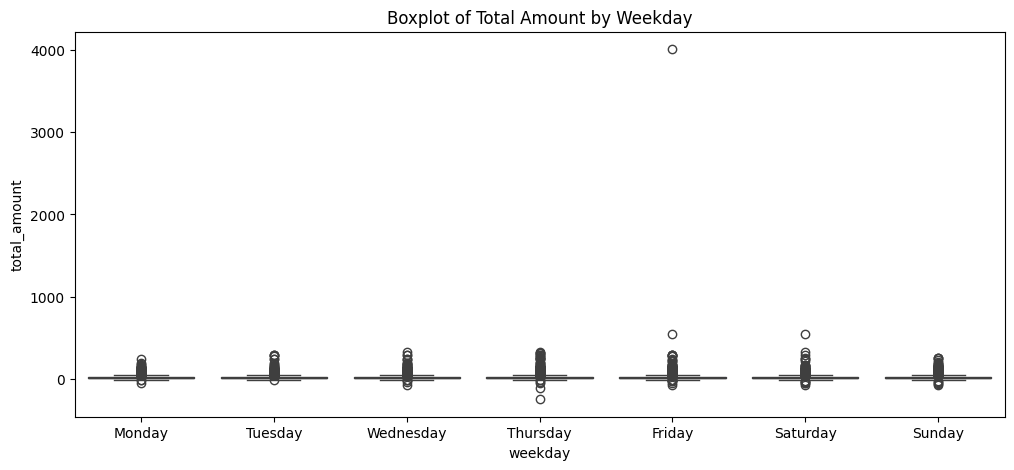

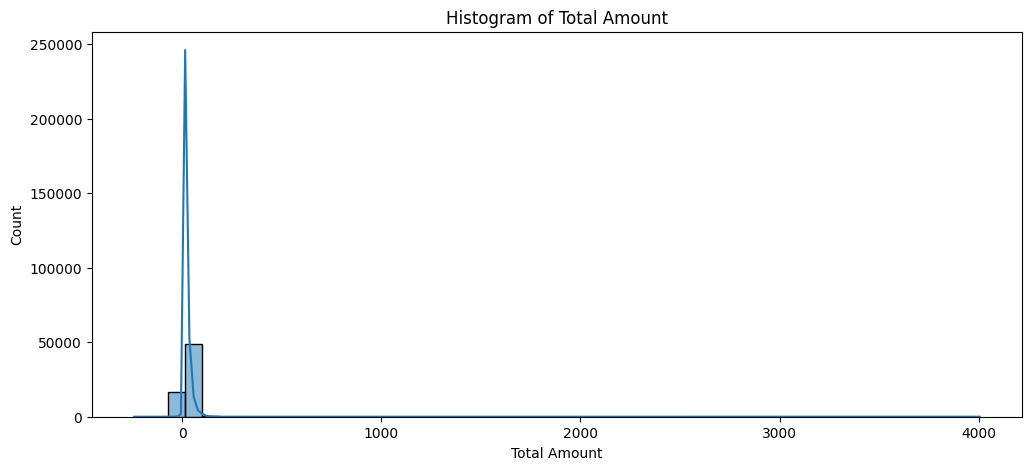

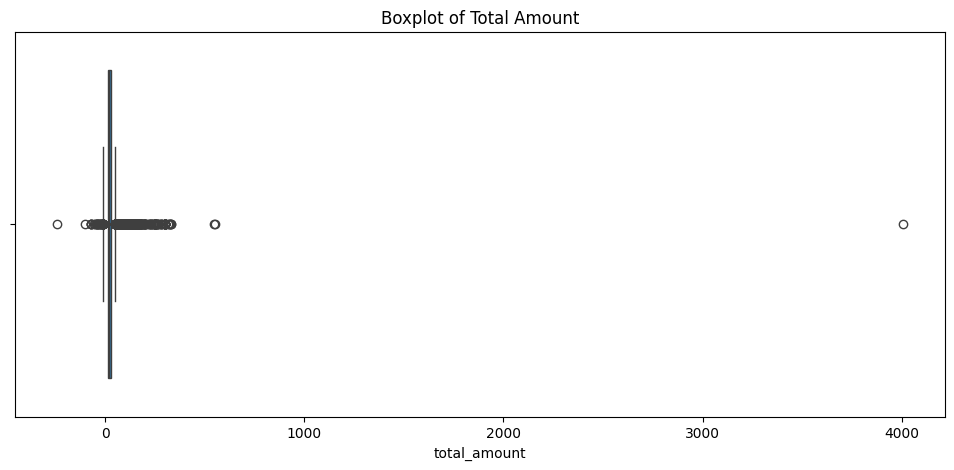

<ipython-input-50-9b4f700c90f4>:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(Taxi['total_amount'], shade=True)


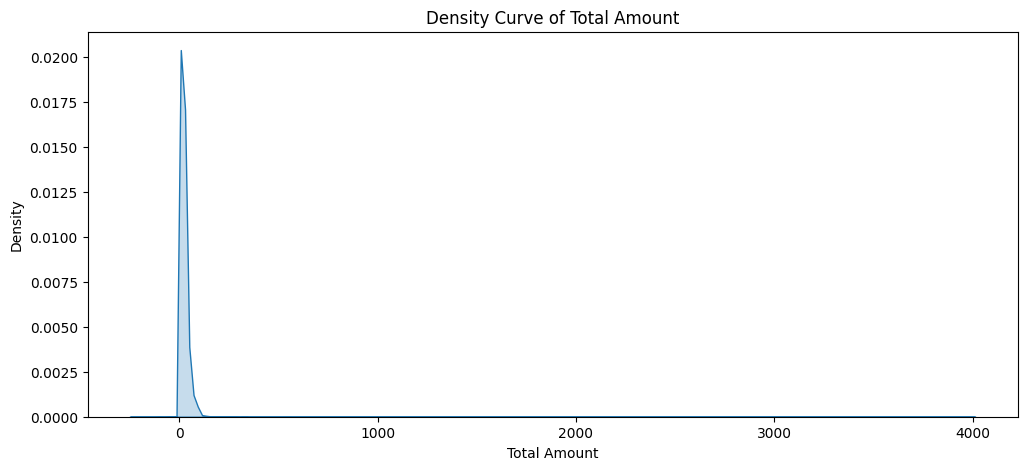

In [ ]:
plt.figure(figsize=(12,5))
#sns.boxplot(x='trip_type', y='total_amount', data=Taxi)
sns.boxplot(x='trip_type', y='total_amount', data=Taxi)
plt.title('Boxplot of Total Amount by Trip Type')
plt.show()
plt.figure(figsize=(12,5))
sns.boxplot(x='weekday', y='total_amount', data=Taxi, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Boxplot of Total Amount by Weekday')
plt.show()

plt.figure(figsize=(12,5))
sns.histplot(Taxi['total_amount'], bins=50, kde=True)
plt.title('Histogram of Total Amount')
plt.xlabel('Total Amount')
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(x=Taxi['total_amount'])
plt.title('Boxplot of Total Amount')
plt.show()

plt.figure(figsize=(12,5))
sns.kdeplot(Taxi['total_amount'], shade=True)
plt.title('Density Curve of Total Amount')
plt.xlabel('Total Amount')
plt.show()

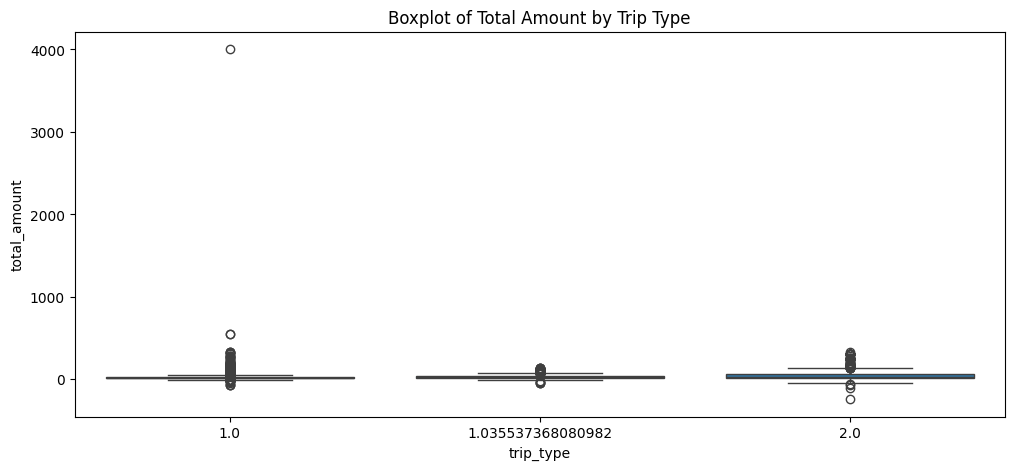

In [ ]:
# Accessing the one-hot encoded column for 'trip_type' which is likely named 'trip_type_2' (as 'drop_first=True' was used in get_dummies)
plt.figure(figsize=(12,5))
sns.boxplot(x='trip_type', y='total_amount', data=Taxi)
plt.title('Boxplot of Total Amount by Trip Type')
plt.show()

In [ ]:
object_vars = ['store_and_fwd_flag', 'RatecodeID', 'payment_type', 'trip_type', 'weekday', 'hourofday'] # Changed 'hour_of_day' to 'hourofday'
print(f'Object variables: {object_vars}')
Taxi = pd.get_dummies(Taxi, columns=object_vars, drop_first=True)  #  Dummy encode object columns
print(f'Dataset after dummy encoding: {Taxi.shape}')

Object variables: ['store_and_fwd_flag', 'RatecodeID', 'payment_type', 'trip_type', 'weekday', 'hourofday']
Dataset after dummy encoding: (65550, 57)


In [ ]:
# r)	Build the following Regression Models:
#Multiple Linear Regression
#Decision Tree
#Random Forest with 100 trees
#Gradient Boosting with 100 trees


In [ ]:
Taxi.dropna(inplace=True)
Taxi.drop_duplicates(inplace=True)

In [ ]:
label_encoders = {}
for column in Taxi.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    Taxi[column] = le.fit_transform(Taxi[column])
    label_encoders[column] = le

In [ ]:
target_column = "total_amount"  # Change if needed
X = Taxi.drop(columns=[target_column])  # Feature set
y = Taxi[target_column]

In [ ]:
numeric_features = Taxi.select_dtypes(include=['number']).columns
X = Taxi[numeric_features].drop(columns=['total_amount'])  # Exclude target variable
y = Taxi['total_amount']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{model_name} Performance:")
    print(f" - MSE: {mse:.2f}")
    print(f" - RMSE: {rmse:.2f}")
    print(f" - R² Score: {r2:.2f}")

In [ ]:
# <-------------- Linear Regression -----------------> is a statistical method used to model relationships between a dependent variable and one or more independent variables.
# It predicts outcomes by fitting a linear equation to data.
# Common types include simple and multiple linear regression.
# It’s widely used in forecasting, trend analysis, and machine learning applications.

In [ ]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
evaluate_model(y_test, y_pred_lr, "Multiple Linear Regression")



Multiple Linear Regression Performance:
 - MSE: 0.26
 - RMSE: 0.51
 - R² Score: 1.00


In [ ]:
# A <---------Decision Tree -----------> is a machine learning algorithm used for classification and regression tasks.
# It splits data into branches based on feature conditions, forming a tree-like structure.
# Key concepts include nodes, branches, and leaves.
# Decision trees are easy to interpret but prone to overfitting without pruning or regularization techniques.

In [ ]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
evaluate_model(y_test, y_pred_dt, "Decision Tree Regression")



Decision Tree Regression Performance:
 - MSE: 1.01
 - RMSE: 1.01
 - R² Score: 1.00


In [ ]:
# <--------- Random Forest------------> is an ensemble learning algorithm that combines multiple decision trees to improve accuracy and reduce overfitting.
# It randomly selects data samples and features for each tree, averaging results for regression or using majority voting for classification.
# It’s robust, handles missing data well, and is widely used in machine learning.

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
evaluate_model(y_test, y_pred_rf, "Random Forest Regression")


Random Forest Regression Performance:
 - MSE: 0.70
 - RMSE: 0.84
 - R² Score: 1.00


In [ ]:
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
evaluate_model(y_test, y_pred_gb, "Gradient Boosting Regression")


Gradient Boosting Regression Performance:
 - MSE: 0.63
 - RMSE: 0.79
 - R² Score: 1.00


In [ ]:
# <--------- Gradient Boosting --------> is a powerful machine learning algorithm that builds models in stages, improving each step by correcting previous errors.
# It combines weak decision trees to create a strong predictor.
# Used for classification and regression, it’s effective but can be slow. Popular versions include XGBoost, LightGBM, and CatBoost.

In [ ]:
# Bonus task is convert Multiple Linear Regression model into streamlit app.

In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 65.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.6 MB/s eta 0:00:00


In [ ]:
# Bonus task is convert Multiple Linear Regression model into streamlit app.

In [ ]:
import streamlit as st

In [ ]:
features = ['trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount']
target = 'total_amount'
Taxi = Taxi.dropna(subset=features + [target])

In [ ]:
X = Taxi[features]
y = Taxi[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

st.title("Multiple Linear Regression Taxi Fare Prediction")
st.write("This app predicts taxi fare based on various trip attributes.")


2025-02-28 09:52:04.551 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 09:52:04.555 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 09:52:04.558 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 09:52:04.560 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 09:52:04.564 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 09:52:04.566 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [ ]:
st.sidebar.header("Input Features")
def user_input_features():
    input_data = {}
    for feature in features:
        input_data[feature] = st.sidebar.number_input(f"{feature}", value=float(Taxi[feature].mean()))
    return pd.DataFrame([input_data])
input_Taxi = user_input_features()
prediction = model.predict(input_Taxi)


2025-02-28 09:50:38.682 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 09:50:38.683 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 09:50:38.686 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 09:50:38.687 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 09:50:38.688 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 09:50:38.689 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 09:50:38.691 Session state does not function when running a script without `streamlit run`
2025-02-28 09:50:38.693 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 09:50

In [ ]:
st.subheader("Model Evaluation")
st.write(f"Mean Squared Error: {mse:.2f}")
st.write(f"R² Score: {r2:.2f}")

st.subheader("Prediction")
st.write(f"Estimated Total Fare: ${prediction[0]:.2f}")


2025-02-28 09:50:38.748 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 09:50:38.757 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 09:50:38.758 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 09:50:38.759 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 09:50:38.760 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 09:50:38.763 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 09:50:38.764 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 09:50:38.764 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
from nltk.chat.util import Chat, reflections

In [ ]:
def get_summary():
    return Taxi.describe().to_string()

def get_columns():
    return ", ".join(Taxi.columns)

def get_sample_data():
    return Taxi.head().to_string()
def get_fare_summary():
    return Taxi[['fare_amount', 'tip_amount', 'total_amount']].describe().to_string()

def get_trip_distance_summary():
    return Taxi[['trip_distance']].describe().to_string()


In [ ]:
def get_column_data(column_name):
    if column_name in Taxi.columns:
        return Taxi[column_name].dropna().sample(5).to_string()
    return "Column not found in the dataset."

In [ ]:
pairs = [
    [
        r"hi|hello|hey",
        ["Hello! Welcome to the Taxi Data Chatbot.", "Hi there! How can I assist you?"]
    ],
    [
        r"what columns are available?",
        [lambda matches: f"The dataset contains the following columns: {get_columns()}."]
    ],
    [
        r"give me a summary of the data",
        [lambda matches: f"Here's a summary of the dataset:\n{get_summary()}."]
    ],
    [
        r"show me some sample data",
        [lambda matches: f"Here are some sample records:\n{get_sample_data()}."]
    ],
    [
        r"show me some values from (.*)",
        [lambda matches: f"Here are some sample values from {matches[0]}:\n{get_column_data(matches[0])}."]
    ],
    [
        r"(.*) your name ?",
        ["I'm a chatbot that provides insights into the taxi dataset!"]
    ],
    [
        r"quit",
        ["Goodbye! Have a great day!", "See you later!"]
    ]
]

In [ ]:
chatbot = Chat(pairs, reflections)
def start_chat():
    print("Hello! I'm a chatbot that can analyze taxi data. Type 'quit' to exit.")
    chatbot.converse()


In [ ]:
st.title("Taxi Data Chatbot")
st.write("This chatbot provides insights into the taxi dataset.")

if st.button("Start Chat in Console"):
    start_chat()


2025-02-28 09:50:41.179 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 09:50:41.182 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 09:50:41.185 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 09:50:41.193 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 09:50:41.212 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 09:50:41.215 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 09:50:41.221 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 09:50:41.226 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
st.title("NYC Taxi Fare Prediction")
# User Inputs
trip_distance = st.number_input("Trip Distance")
passenger_count = st.number_input("Passenger Count")

# Predict Button
if st.button("Predict Fare"):
    input_data = np.array([[trip_distance, passenger_count]])
    input_data = scaler.transform(input_data)
    prediction = lr.predict(input_data)
    st.write(f"Predicted Fare: ${prediction[0]:.2f}")


2025-02-28 09:50:41.255 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 09:50:41.269 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 09:50:41.272 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 09:50:41.274 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 09:50:41.278 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 09:50:41.279 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 09:50:41.284 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 09:50:41.286 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar